**5. Boosting**

In this section the two boosting algorithmns `AdaBoost` and `XGBoost` are investigated. Sklearn's `GradientBoostingRegressor` does not seem to perform well and is slow. It is only applied for the suburb example as a test. `StandardScaler()` is used upfront with the aim to speed up the optimization.

For `XGBoost` we use sklearn's wrappper interface. `eta` is in this set-up the learning rate. Building the trees can be randomized by the several parameters (https://stackoverflow.com/questions/51022822/subsample-colsample-bytree-colsample-bylevel-in-xgbclassifier-python-3-x, https://xgboost.readthedocs.io/en/latest/parameter.html):
- `subsample`: is the fraction of obervations that are used to train the model,
- `colsample_bytree`: is the fraction of features that are used to build each tree.
- `colsample_bynode`: is the fraction of features that are in each node.

There is also the parameter `colsample_bylevel`.

To speed up the optimization `RandomizedSearchCV()` is used instead of `GridSearchCV()`.

*Remark*: Retrieving the feature importance does not seem to work for `XGBoost` (https://datascience.stackexchange.com/questions/16008/how-to-determine-feature-importance-while-using-xgboost-in-pipeline).

The following grids are used:

In [368]:
# AdaBoost
# --------
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Loss function
loss = ['linear', 'square', 'exponential']
# Learinign rate
learning_rate = np.logspace(start = -3, stop = 3, num = 7)

param_grid_ada = {'ada__n_estimators': n_estimators,
                  'ada__loss': loss,
                  'ada__learning_rate': learning_rate}
print(param_grid_ada)

# XGBoost
# -------
#'xgb__learning_rate': [0.01, 0.02, 0.05, 0.1 ],
param_grid_xgb = {'xgb__eta': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
                  'xgb__max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
                  'xgb__min_child_weight' : [ 1, 3, 5, 7 ],
                  'xgb__gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                  'xgb__colsample_bytree': [0.3, 0.5, 0.7, 1]}
print(param_grid_xgb)

# Gradient Boosting
# -----------------
# Loss function
loss = ['ls', 'lad', 'huber', 'quantile']

# Learinign rate
learning_rate = np.logspace(start = -3, stop = 3, num = 7)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10] 

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

param_grid_gb = {'gb__loss': loss,
                 'gb__learning_rate': learning_rate,
                 'gb__n_estimators': n_estimators,
                 'gb__min_samples_split': min_samples_split,
                 'gb__max_depth': max_depth,
                 'gb__max_features': max_features}
param_grid_gb

{'ada__n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'ada__loss': ['linear', 'square', 'exponential'], 'ada__learning_rate': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}
{'xgb__eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'xgb__max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'xgb__min_child_weight': [1, 3, 5, 7], 'xgb__gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'xgb__colsample_bytree': [0.3, 0.5, 0.7, 1]}


{'gb__loss': ['ls', 'lad', 'huber', 'quantile'],
 'gb__learning_rate': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'gb__n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
 'gb__min_samples_split': [2, 5, 10],
 'gb__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'gb__max_features': ['auto', 'sqrt', 'log2']}

*Aggregation by Suburbs*

AdaBoost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.58 / RMSE train 0.17 / MAE train 0.13 / Nobs: 14261
R2 test: 0.59 / RMSE test 0.17 / MAE test 0.13 / Nobs: 4451

Transformed
-----------
R2 train: 0.47 / RMSE train 63.08 / MAE train 39.14 / Nobs: 14261
R2 test: 0.49 / RMSE test 61.15 / MAE test 38.45 / Nobs: 4451



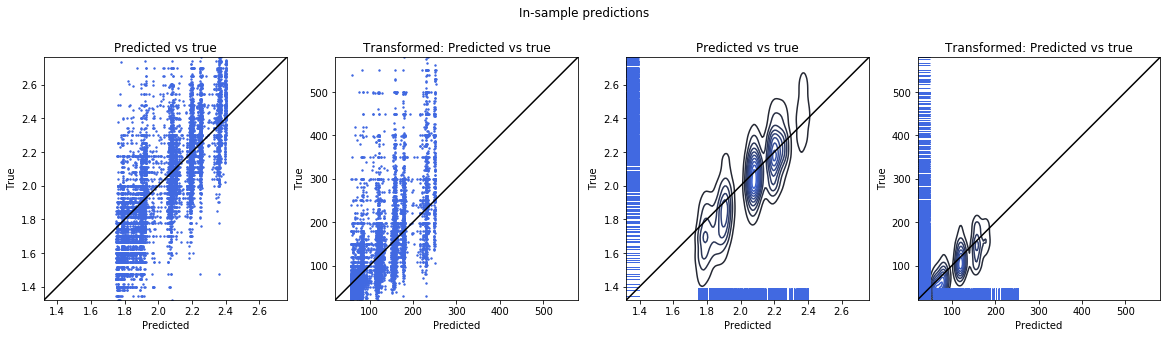

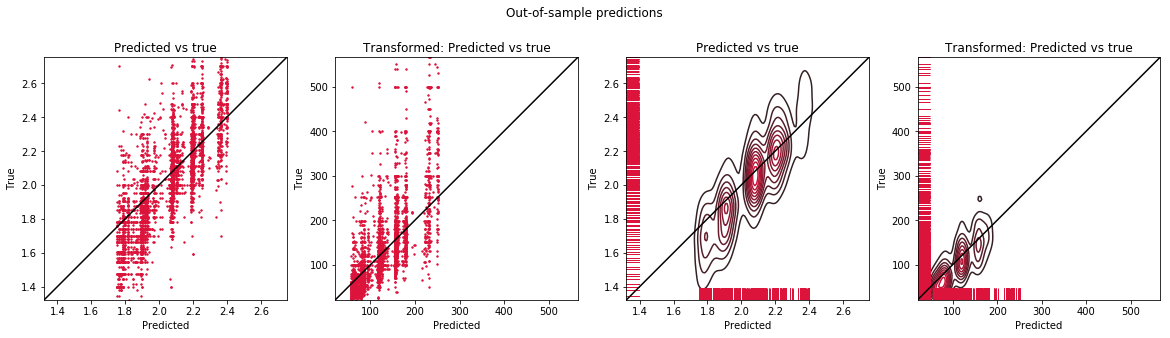

In [369]:
train_tpl = (X_train_suburb, y_train_suburb)
test_tpl = (X_test_suburb, y_test_suburb)
ada_suburb = print_results('Ada_suburbs.p', test_tpl, train_tpl, 'both', True)

In [370]:
best_params = ada_suburb['fitted_model'].best_params_
best_params

{'ada__n_estimators': 100,
 'ada__loss': 'exponential',
 'ada__learning_rate': 0.1}

Feature importance

In [371]:
names = tuple(np.delete(train_suburb.columns.values, 0))
values = tuple(ada_suburb['fitted_model'].best_estimator_.named_steps['ada'].feature_importances_)

fi_suburb = pd.DataFrame(zip(names,values))
fi_suburb.columns = ('Variable', 'Importance')
fi_suburb

,Variable,Importance
0,Air_log_price_suburb_same_room_type,0.652078
1,Air_calculated_host_listings_count,0.011896
2,Air_bathrooms,0.049620
3,Air_beds,0.009021
4,Air_bedrooms,0.101116
5,Air_accommodates,0.078223
6,Air_extra_people,0.040450
7,Air_guests_included,0.010855
8,Air_distance_to_CBD,0.027919
9,Air_property_type_2_House_Cottage_Villa,0.000374


*XGBoost*

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.73 / RMSE train 0.14 / MAE train 0.10 / Nobs: 14261
R2 test: 0.66 / RMSE test 0.16 / MAE test 0.12 / Nobs: 4451

Transformed
-----------
R2 train: 0.64 / RMSE train 51.55 / MAE train 30.32 / Nobs: 14261
R2 test: 0.55 / RMSE test 57.69 / MAE test 34.86 / Nobs: 4451



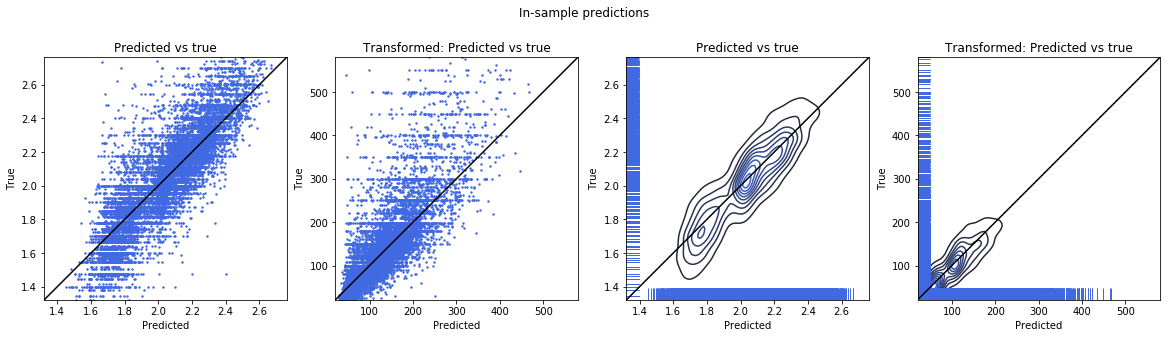

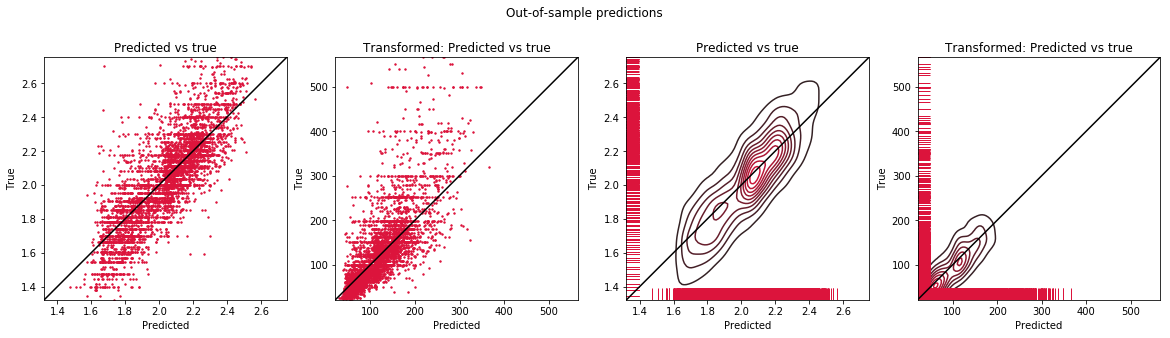

In [372]:
train_tpl = (X_train_suburb, y_train_suburb)
test_tpl = (X_test_suburb, y_test_suburb)
xgb_suburb = print_results('XGB_suburbs.p', test_tpl, train_tpl, 'both', True)

In [373]:
best_params = xgb_suburb['fitted_model'].best_params_
best_params

{'xgb__min_child_weight': 7,
 'xgb__max_depth': 3,
 'xgb__gamma': 0.3,
 'xgb__eta': 0.25,
 'xgb__colsample_bytree': 0.3}

Feature importance (not working)

Hyper-parameter patterns

In [374]:
min_child_weight = np.array(xgb_suburb['fitted_model'].cv_results_['param_xgb__min_child_weight'])
max_depth = np.array(xgb_suburb['fitted_model'].cv_results_['param_xgb__max_depth'])
gamma = np.array(xgb_suburb['fitted_model'].cv_results_['param_xgb__gamma'])
eta = np.array(xgb_suburb['fitted_model'].cv_results_['param_xgb__eta'])
colsample_bytree = np.array(xgb_suburb['fitted_model'].cv_results_['param_xgb__colsample_bytree'])
mean_test_score = np.array(xgb_suburb['fitted_model'].cv_results_['mean_test_score'])

df = pd.DataFrame(data={'min_child_weight': min_child_weight,
                        'max_depth': max_depth,
                        #'learning_rate': learning_rate,
                        'gamma': gamma,
                        'eta': eta,
                        'colsample_bytree': colsample_bytree,
                        'mean_test_score': mean_test_score})
df = df.sort_values(by='mean_test_score', ascending=False)

In [375]:
df.head(10)

,min_child_weight,max_depth,gamma,eta,colsample_bytree,mean_test_score
21,7,3,0.3,0.25,0.3,0.609758
9,1,4,0.3,0.15,0.3,0.607183
10,5,4,0.2,0.25,0.3,0.606978
19,5,3,0.1,0.1,0.3,0.603239
20,3,4,0.4,0.25,0.3,0.599728
1,1,3,0,0.3,0.5,0.587441
37,3,4,0,0.1,0.5,0.577438
7,3,5,0.1,0.1,0.3,0.576363
31,1,4,0.3,0.15,0.5,0.563904
8,3,6,0.3,0.2,0.3,0.551558


In [376]:
df.tail(10)

,min_child_weight,max_depth,gamma,eta,colsample_bytree,mean_test_score
26,7,5,0.1,0.3,1,0.162229
6,1,12,0.1,0.1,0.5,0.153108
46,1,15,0.4,0.3,1,0.140034
47,7,15,0.3,0.3,1,0.101599
35,5,12,0.2,0.1,1,0.083019
29,5,12,0,0.05,0.5,0.019498
41,5,12,0.1,0.15,0.7,-0.017318
4,7,10,0.1,0.15,1,-0.037604
17,3,15,0.1,0.3,0.7,-0.106239
33,5,15,0,0.05,0.7,-0.344520


The fit is worse when `max_depth` and `colsample_bytree` is large. A high learning rate `eta` increases the fit.

In [377]:
X = df.loc[:, ['min_child_weight', 'max_depth', 'gamma', 'eta', 'colsample_bytree']]
y = df.loc[:, ['mean_test_score']]
X = sm.add_constant(X)
xgb_results = sm.OLS(y, X.astype(float)).fit()
print(xgb_results.summary())

                            OLS Regression Results                            
Dep. Variable:        mean_test_score   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     50.35
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           4.18e-17
Time:                        19:22:35   Log-Likelihood:                 54.735
No. Observations:                  50   AIC:                            -97.47
Df Residuals:                      44   BIC:                            -86.00
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7350      0.048  

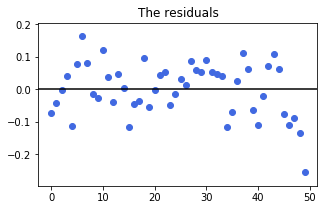

In [378]:
mean = np.mean(xgb_results.resid)
fig, ax = plt.subplots(1,1, figsize=(5,3))
ax.scatter(x=range(xgb_results.resid.shape[0]), y=xgb_results.resid, alpha=1, color=col1)
ax.axhline(mean, color="black")
ax.set_title("The residuals");

Gradient Boosting (bad performance, not considered for the other aggregations)

The algorithm is very slow so that only 10 random samples of hyper-parameter combinations are considered.

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.65 / RMSE train 0.16 / MAE train 0.13 / Nobs: 14261
R2 test: 0.43 / RMSE test 0.20 / MAE test 0.16 / Nobs: 4451

Transformed
-----------
R2 train: 0.47 / RMSE train 62.96 / MAE train 37.92 / Nobs: 14261
R2 test: 0.30 / RMSE test 71.57 / MAE test 45.60 / Nobs: 4451



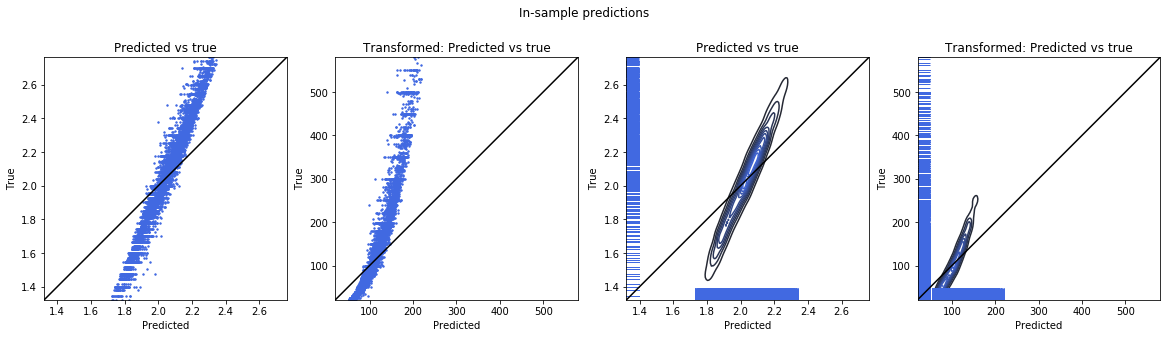

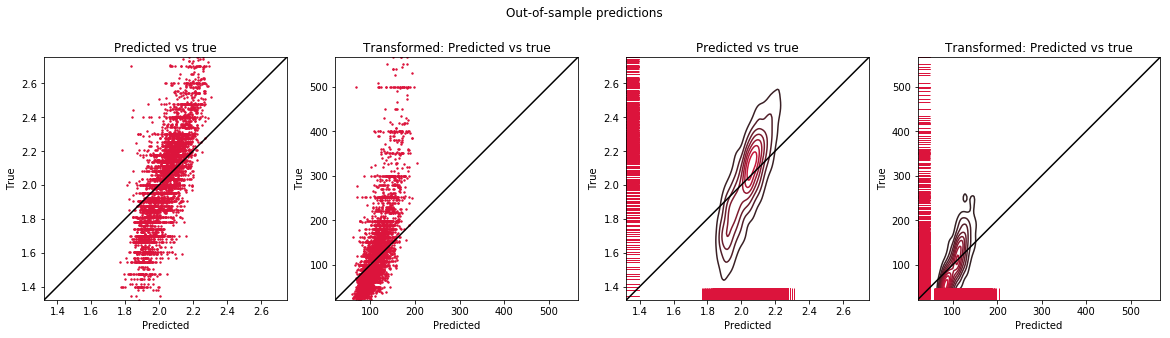

In [379]:
train_tpl = (X_train_suburb, y_train_suburb)
test_tpl = (X_test_suburb, y_test_suburb)
gb_suburb = print_results('GB_suburbs.p', test_tpl, train_tpl, 'both', True)

In [380]:
best_params = gb_suburb['fitted_model'].best_params_
best_params

{'gb__n_estimators': 60,
 'gb__min_samples_split': 2,
 'gb__max_features': 'log2',
 'gb__max_depth': 100,
 'gb__loss': 'ls',
 'gb__learning_rate': 0.01}

Feature importance

In [381]:
names = tuple(np.delete(train_suburb.columns.values, 0))
values = tuple(gb_suburb['fitted_model'].best_estimator_.named_steps['gb'].feature_importances_)

fi_suburb = pd.DataFrame(zip(names,values))
fi_suburb.columns = ('Variable', 'Importance')
fi_suburb

,Variable,Importance
0,Air_log_price_suburb_same_room_type,0.244436
1,Air_calculated_host_listings_count,0.032123
2,Air_bathrooms,0.039486
3,Air_beds,0.056874
4,Air_bedrooms,0.110083
5,Air_accommodates,0.106749
6,Air_extra_people,0.039766
7,Air_guests_included,0.040263
8,Air_distance_to_CBD,0.092482
9,Air_property_type_2_House_Cottage_Villa,0.015434


*Constructed aggregation - 500m*

AdaBoost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.59 / RMSE train 0.17 / MAE train 0.13 / Nobs: 13230
R2 test: 0.59 / RMSE test 0.17 / MAE test 0.13 / Nobs: 3739

Transformed
-----------
R2 train: 0.47 / RMSE train 62.45 / MAE train 38.84 / Nobs: 13230
R2 test: 0.47 / RMSE test 62.25 / MAE test 38.42 / Nobs: 3739



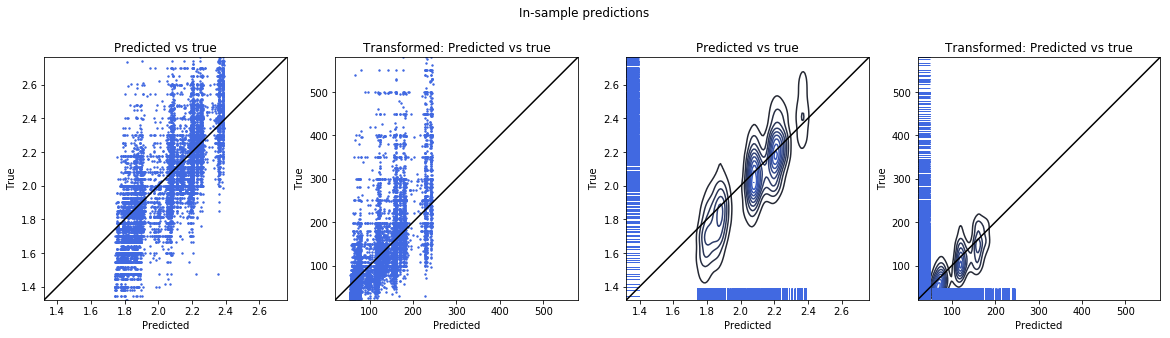

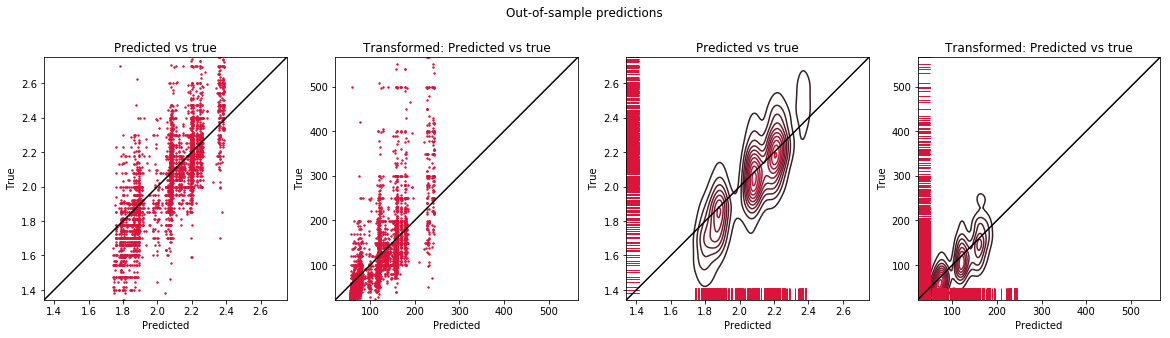

In [382]:
train_tpl = (X_train_500m, y_train_500m)
test_tpl = (X_test_500m, y_test_500m)
ada_500m = print_results('Ada_500m.p', test_tpl, train_tpl, 'both', True)

In [383]:
best_params = ada_500m['fitted_model'].best_params_
best_params

{'ada__n_estimators': 100,
 'ada__loss': 'exponential',
 'ada__learning_rate': 0.1}

In [384]:
names = tuple(np.delete(train_500m.columns.values, 0))
values = tuple(ada_500m['fitted_model'].best_estimator_.named_steps['ada'].feature_importances_)

fi_500m = pd.DataFrame(zip(names,values))
fi_500m.columns = ('Variable', 'Importance')
fi_500m

,Variable,Importance
0,Air_log_price_500m_same_room_type,0.595365
1,Air_calculated_host_listings_count,0.019116
2,Air_bathrooms,0.041588
3,Air_beds,0.006979
4,Air_bedrooms,0.103644
5,Air_accommodates,0.128927
6,Air_extra_people,0.020875
7,Air_guests_included,0.013145
8,Air_distance_to_CBD,0.044578
9,Air_property_type_2_House_Cottage_Villa,0.000231


XGBoost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.77 / RMSE train 0.13 / MAE train 0.09 / Nobs: 13230
R2 test: 0.71 / RMSE test 0.14 / MAE test 0.10 / Nobs: 3739

Transformed
-----------
R2 train: 0.70 / RMSE train 47.36 / MAE train 28.31 / Nobs: 13230
R2 test: 0.63 / RMSE test 52.10 / MAE test 31.18 / Nobs: 3739



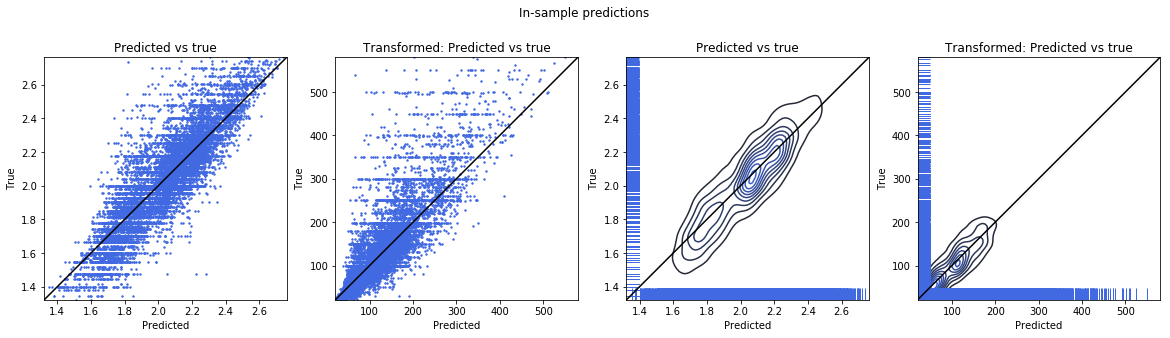

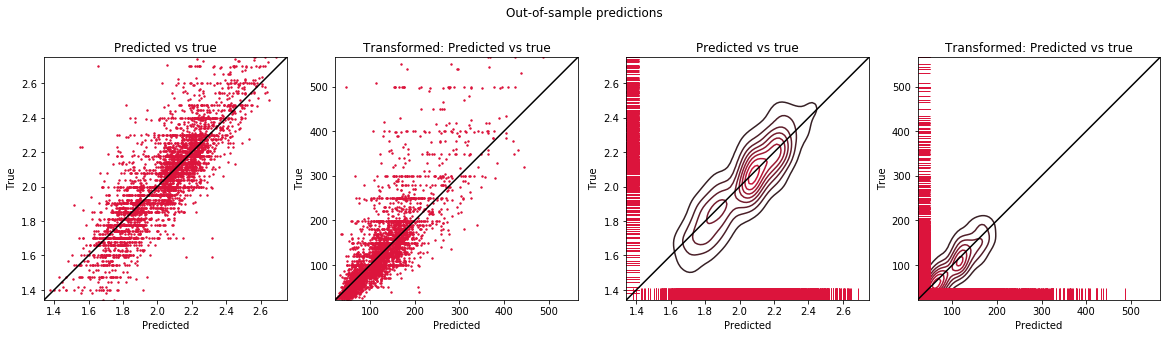

In [385]:
train_tpl = (X_train_500m, y_train_500m)
test_tpl = (X_test_500m, y_test_500m)
xgb_500m = print_results('XGB_500m.p', test_tpl, train_tpl, 'both', True)

In [386]:
best_params = xgb_500m['fitted_model'].best_params_
best_params

{'xgb__min_child_weight': 7,
 'xgb__max_depth': 8,
 'xgb__gamma': 0.0,
 'xgb__eta': 0.05,
 'xgb__colsample_bytree': 0.3}

*Constructed aggregation - 100m*

Ada Boost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.58 / RMSE train 0.16 / MAE train 0.12 / Nobs: 9203
R2 test: 0.60 / RMSE test 0.15 / MAE test 0.11 / Nobs: 2177

Transformed
-----------
R2 train: 0.45 / RMSE train 61.71 / MAE train 37.56 / Nobs: 9203
R2 test: 0.48 / RMSE test 55.59 / MAE test 35.24 / Nobs: 2177



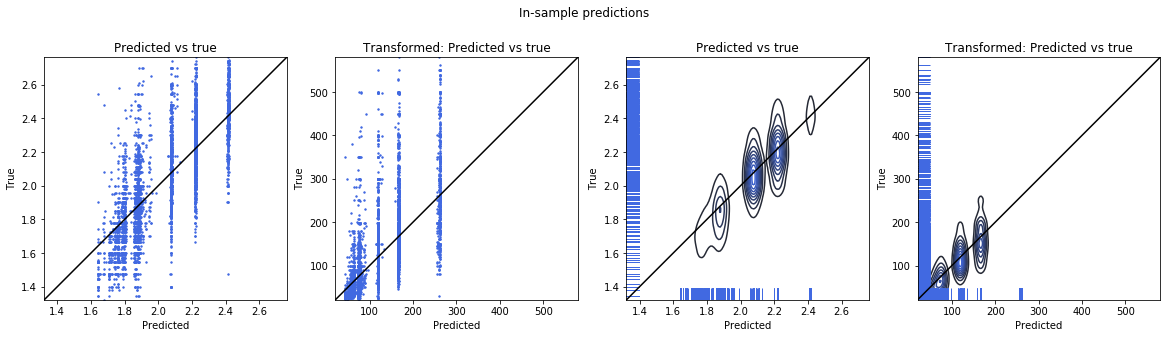

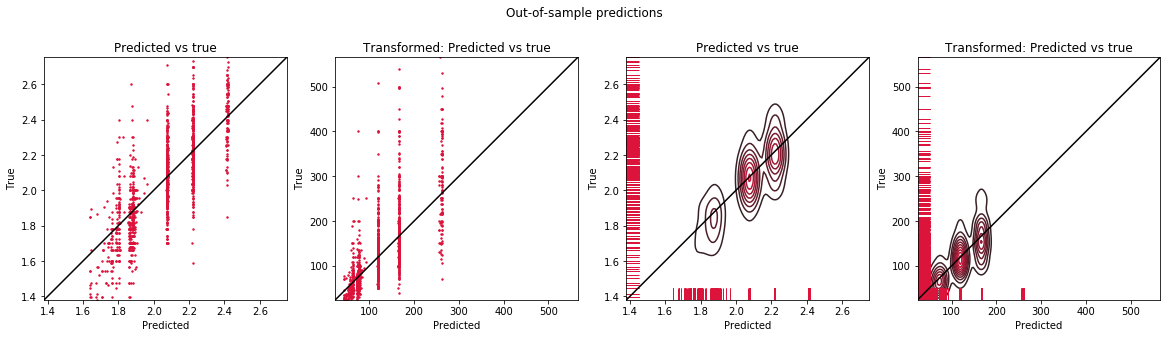

In [387]:
train_tpl = (X_train_100m, y_train_100m)
test_tpl = (X_test_100m, y_test_100m)
ada_100m = print_results('Ada_100m.p', test_tpl, train_tpl, 'both', True)

In [388]:
best_params = ada_100m['fitted_model'].best_params_
best_params

{'ada__n_estimators': 180, 'ada__loss': 'linear', 'ada__learning_rate': 0.01}

Feature importance

In [389]:
names = tuple(np.delete(train_100m.columns.values, 0))
values = tuple(ada_suburb['fitted_model'].best_estimator_.named_steps['ada'].feature_importances_)

fi_100m = pd.DataFrame(zip(names,values))
fi_100m.columns = ('Variable', 'Importance')
fi_100m

,Variable,Importance
0,Air_log_price_100m_same_room_type,0.652078
1,Air_calculated_host_listings_count,0.011896
2,Air_bathrooms,0.049620
3,Air_beds,0.009021
4,Air_bedrooms,0.101116
5,Air_accommodates,0.078223
6,Air_extra_people,0.040450
7,Air_guests_included,0.010855
8,Air_distance_to_CBD,0.027919
9,Air_property_type_2_House_Cottage_Villa,0.000374


XGBoost

Untransformed
-------------
R2 train: 0.78 / RMSE train 0.12 / MAE train 0.09 / Nobs: 9203
R2 test: 0.68 / RMSE test 0.13 / MAE test 0.10 / Nobs: 2177

Transformed
-----------
R2 train: 0.70 / RMSE train 45.04 / MAE train 27.37 / Nobs: 9203
R2 test: 0.60 / RMSE test 48.65 / MAE test 30.13 / Nobs: 2177



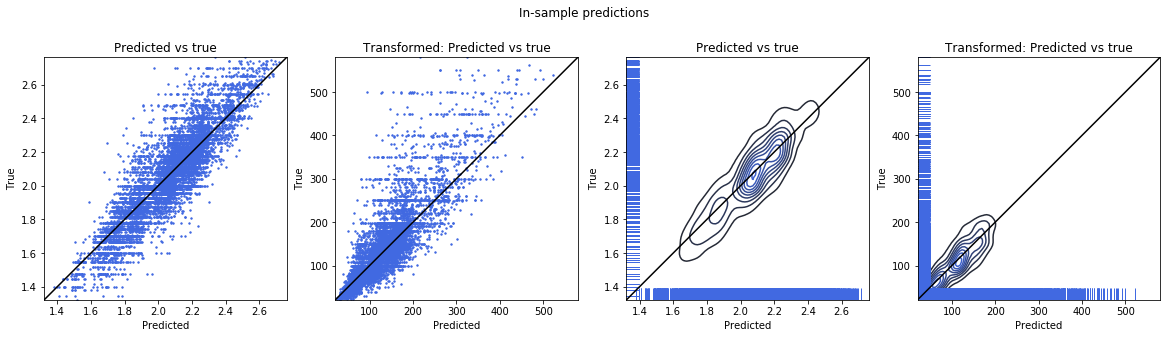

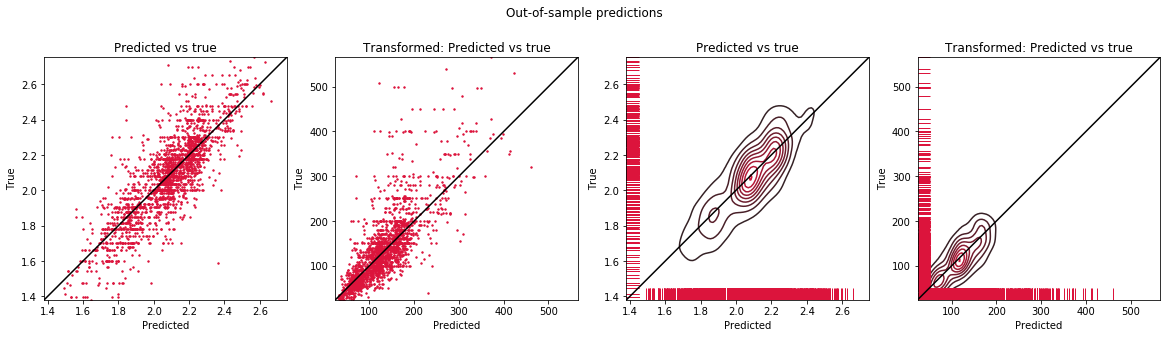

In [390]:
train_tpl = (X_train_100m, y_train_100m)
test_tpl = (X_test_100m, y_test_100m)
xgb_100m = print_results('XGB_100m.p', test_tpl, train_tpl, 'both', True)

In [391]:
best_params = xgb_100m['fitted_model'].best_params_
best_params

{'xgb__min_child_weight': 1,
 'xgb__max_depth': 12,
 'xgb__gamma': 0.1,
 'xgb__eta': 0.1,
 'xgb__colsample_bytree': 0.5}

*Constructed aggregation - 50m*

Ada Boost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.56 / RMSE train 0.15 / MAE train 0.11 / Nobs: 6522
R2 test: 0.60 / RMSE test 0.14 / MAE test 0.10 / Nobs: 1340

Transformed
-----------
R2 train: 0.42 / RMSE train 61.38 / MAE train 37.04 / Nobs: 6522
R2 test: 0.47 / RMSE test 52.96 / MAE test 33.70 / Nobs: 1340



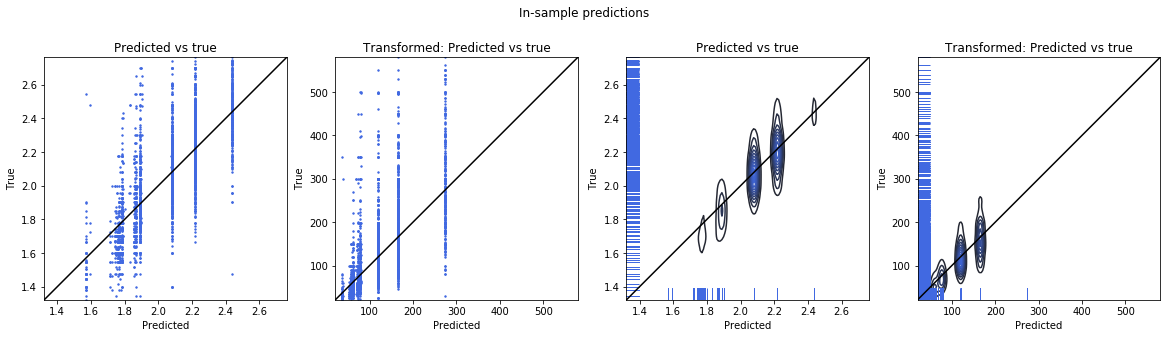

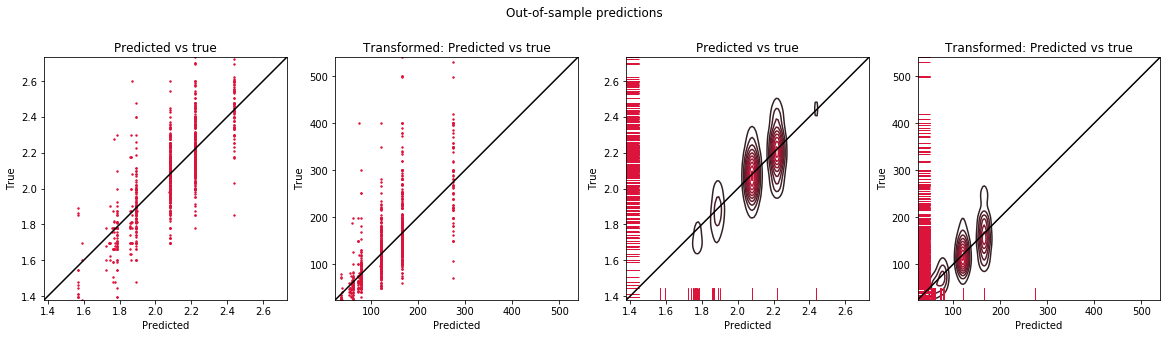

In [392]:
train_tpl = (X_train_50m, y_train_50m)
test_tpl = (X_test_50m, y_test_50m)
ada_50m = print_results('Ada_50m.p', test_tpl, train_tpl, 'both', True)

In [393]:
best_params = ada_50m['fitted_model'].best_params_
best_params

{'ada__n_estimators': 20, 'ada__loss': 'square', 'ada__learning_rate': 0.01}

Feature importance

In [394]:
names = tuple(np.delete(train_50m.columns.values, 0))
values = tuple(ada_50m['fitted_model'].best_estimator_.named_steps['ada'].feature_importances_)

fi_50m = pd.DataFrame(zip(names,values))
fi_50m.columns = ('Variable', 'Importance')
fi_50m

,Variable,Importance
0,Air_log_price_50m_same_room_type,0.026413
1,Air_calculated_host_listings_count,0.000124
2,Air_bathrooms,0.000000
3,Air_beds,0.000577
4,Air_bedrooms,0.303180
5,Air_accommodates,0.014366
6,Air_extra_people,0.005709
7,Air_guests_included,0.000547
8,Air_distance_to_CBD,0.007910
9,Air_property_type_2_House_Cottage_Villa,0.006255


XGBoost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.76 / RMSE train 0.11 / MAE train 0.08 / Nobs: 6522
R2 test: 0.68 / RMSE test 0.12 / MAE test 0.09 / Nobs: 1340

Transformed
-----------
R2 train: 0.69 / RMSE train 45.05 / MAE train 26.65 / Nobs: 6522
R2 test: 0.60 / RMSE test 46.15 / MAE test 28.56 / Nobs: 1340



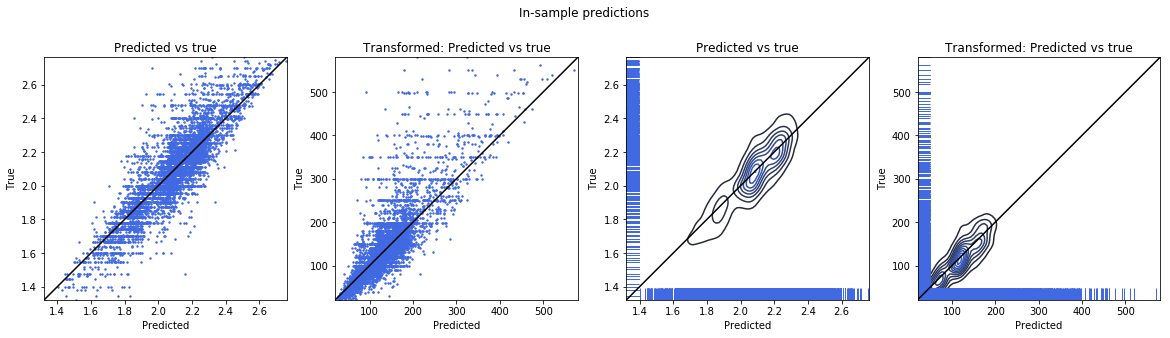

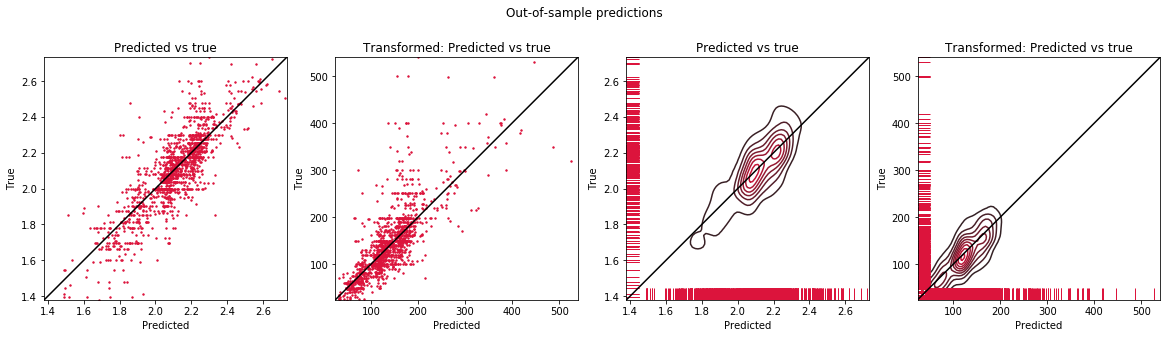

In [395]:
train_tpl = (X_train_50m, y_train_50m)
test_tpl = (X_test_50m, y_test_50m)
xgb_50m = print_results('XGB_50m.p', test_tpl, train_tpl, 'both', True)

In [396]:
best_params = xgb_50m['fitted_model'].best_params_
best_params

{'xgb__min_child_weight': 7,
 'xgb__max_depth': 8,
 'xgb__gamma': 0.0,
 'xgb__eta': 0.05,
 'xgb__colsample_bytree': 0.3}

#### Summary

Let's plot the $R^2$-scores RMSE and MAE of the different model. For all of the models log airbnb prices are used as target and predictions are back transformed to airbnb prices to measure the performance.  We see that `RandomForest` and `xgboost` perform better than the other models. The constructed aggregations as `Air_log_price_500m_same_room_type`, `Air_log_price_100m_same_room_type` and `Air_log_price_50m_same_room_type` also increase the predictive power of the models. The code for the plots is adapted from https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

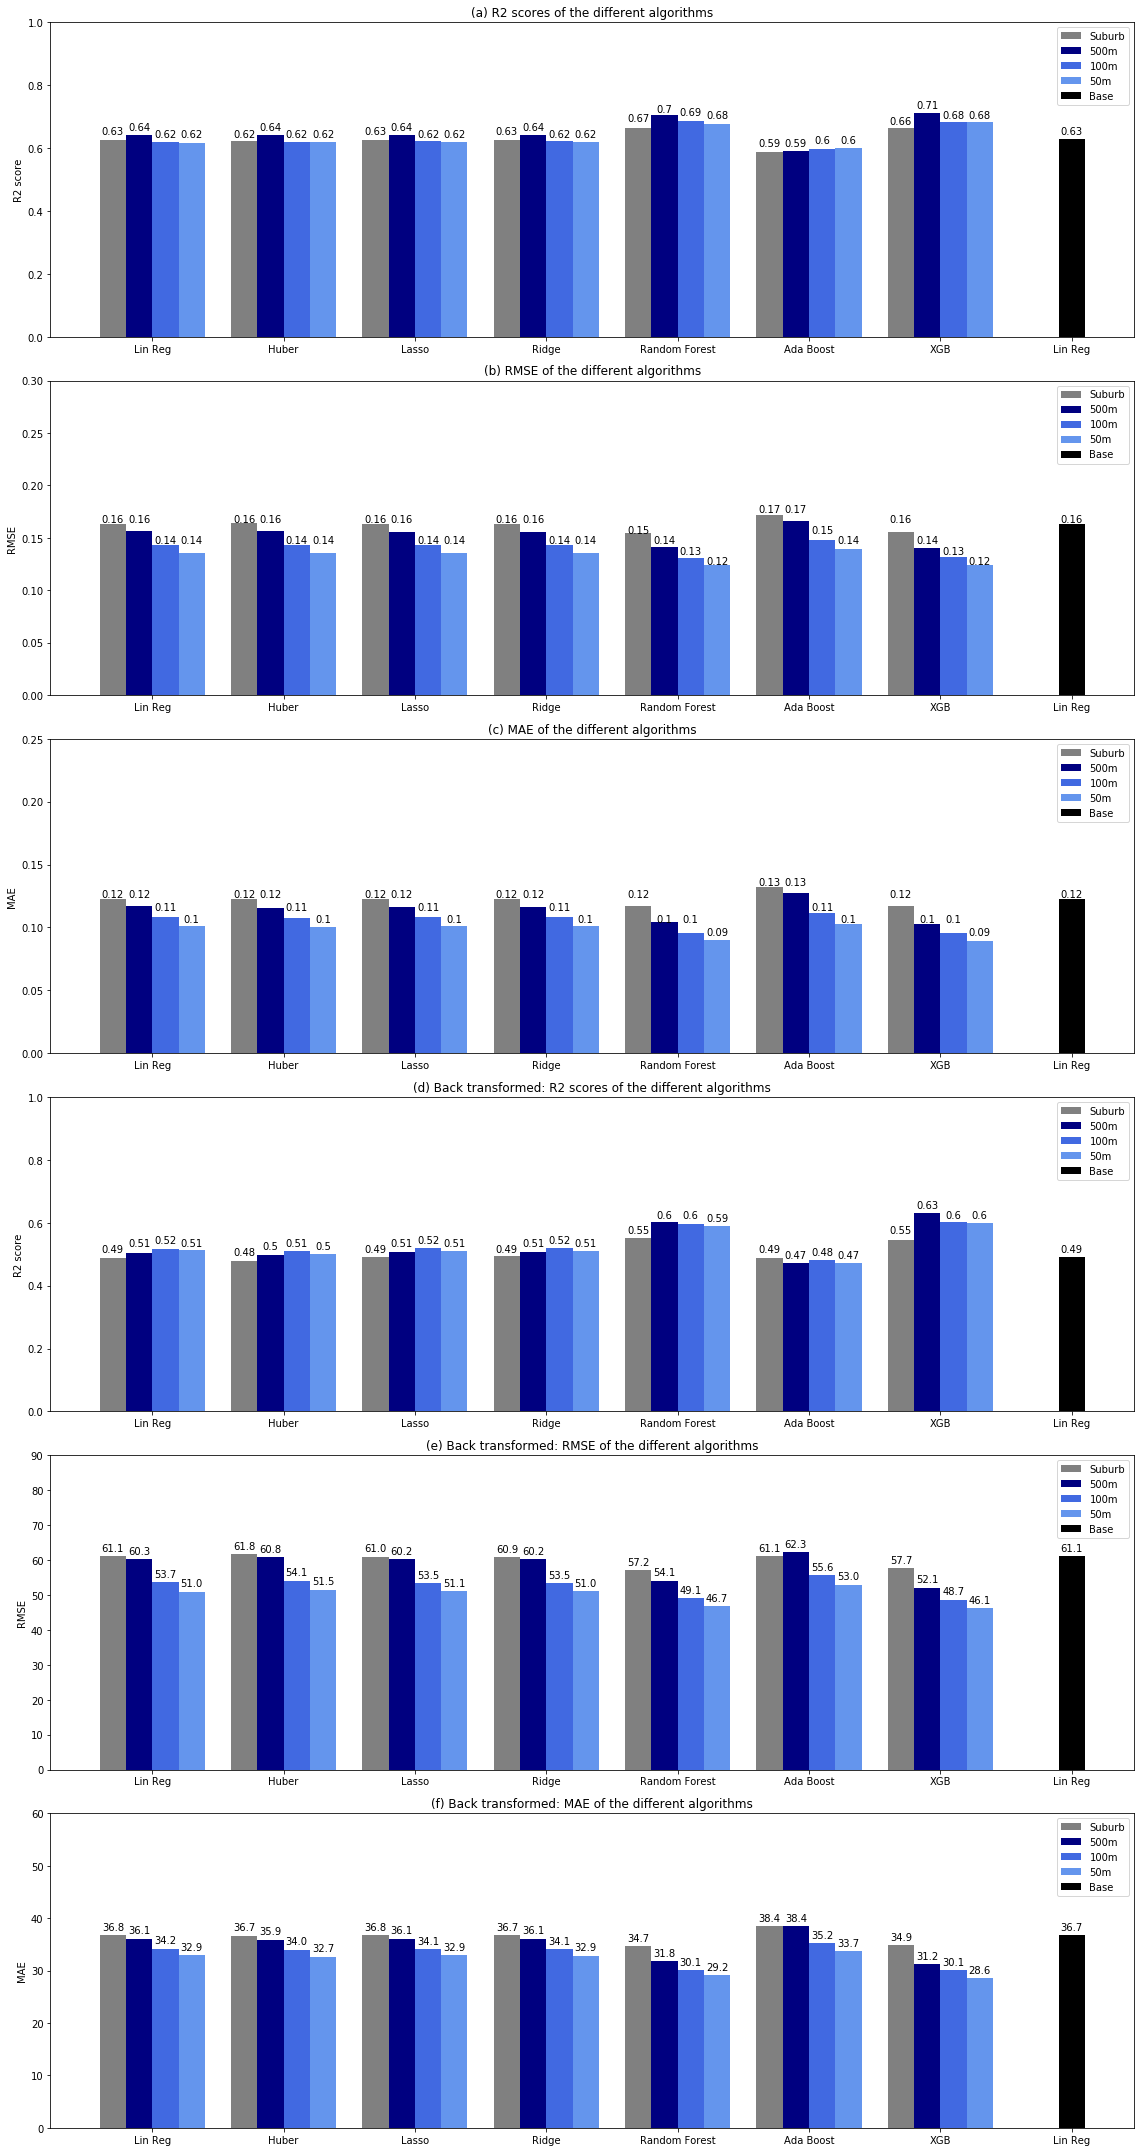

In [397]:
# Source: https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

#base['test_r2']

c1 = 'gray'
c2 = 'navy'
c3 = 'royalblue'
c4 = 'cornflowerblue'

# TRANSFORMED
#############

# R2 score
# --------
r2_suburb = [lin_reg_suburb['test_r2'], 
                huber_suburb['test_r2'],
                lasso_suburb['test_r2'],
                ridge_suburb['test_r2'],
                rf_suburb['test_r2'], 
                ada_suburb['test_r2'],
                xgb_suburb['test_r2']]

r2_500m = [lin_reg_500m['test_r2'],
              huber_500m['test_r2'],
              lasso_500m['test_r2'],
              ridge_500m['test_r2'],
              rf_500m['test_r2'],
              ada_500m['test_r2'],
              xgb_500m['test_r2']]

r2_100m = [lin_reg_100m['test_r2'],
              huber_100m['test_r2'],
              lasso_100m['test_r2'],
              ridge_100m['test_r2'],
              rf_100m['test_r2'],
              ada_100m['test_r2'],
              xgb_100m['test_r2']]

r2_50m = [lin_reg_50m['test_r2'],
              huber_50m['test_r2'],
              lasso_50m['test_r2'],
              ridge_50m['test_r2'],
              rf_50m['test_r2'],
              ada_50m['test_r2'],
              xgb_50m['test_r2']]

r2_base = base['test_r2']

# RMSE
# --------
rmse_suburb = [lin_reg_suburb['test_rmse'], 
                huber_suburb['test_rmse'],
                lasso_suburb['test_rmse'],
                ridge_suburb['test_rmse'],
                rf_suburb['test_rmse'], 
                ada_suburb['test_rmse'],
                xgb_suburb['test_rmse']]

rmse_500m = [lin_reg_500m['test_rmse'],
              huber_500m['test_rmse'],
              lasso_500m['test_rmse'],
              ridge_500m['test_rmse'],
              rf_500m['test_rmse'],
              ada_500m['test_rmse'],
              xgb_500m['test_rmse']]

rmse_100m = [lin_reg_100m['test_rmse'],
              huber_100m['test_rmse'],
              lasso_100m['test_rmse'],
              ridge_100m['test_rmse'],
              rf_100m['test_rmse'],
              ada_100m['test_rmse'],
              xgb_100m['test_rmse']]

rmse_50m = [lin_reg_50m['test_rmse'],
              huber_50m['test_rmse'],
              lasso_50m['test_rmse'],
              ridge_50m['test_rmse'],
              rf_50m['test_rmse'],
              ada_50m['test_rmse'],
              xgb_50m['test_rmse']]

rmse_base = base['test_rmse']

# MAE score
# --------
mae_suburb = [lin_reg_suburb['test_mae'], 
                huber_suburb['test_mae'],
                lasso_suburb['test_mae'],
                ridge_suburb['test_mae'],
                rf_suburb['test_mae'], 
                ada_suburb['test_mae'],
                xgb_suburb['test_mae']]

mae_500m = [lin_reg_500m['test_mae'],
              huber_500m['test_mae'],
              lasso_500m['test_mae'],
              ridge_500m['test_mae'],
              rf_500m['test_mae'],
              ada_500m['test_mae'],
              xgb_500m['test_mae']]

mae_100m = [lin_reg_100m['test_mae'],
              huber_100m['test_mae'],
              lasso_100m['test_mae'],
              ridge_100m['test_mae'],
              rf_100m['test_mae'],
              ada_100m['test_mae'],
              xgb_100m['test_mae']]

mae_50m = [lin_reg_50m['test_mae'],
              huber_50m['test_mae'],
              lasso_50m['test_mae'],
              ridge_50m['test_mae'],
              rf_50m['test_mae'],
              ada_50m['test_mae'],
              xgb_50m['test_mae']]

mae_base = base['test_mae']

# BACK TRANSFORMED
####################

# R2 score
# --------
r2_suburb_back = [lin_reg_suburb['test_r2_transformed'], 
                huber_suburb['test_r2_transformed'],
                lasso_suburb['test_r2_transformed'],
                ridge_suburb['test_r2_transformed'],
                rf_suburb['test_r2_transformed'], 
                ada_suburb['test_r2_transformed'],
                xgb_suburb['test_r2_transformed']]

r2_500m_back = [lin_reg_500m['test_r2_transformed'],
              huber_500m['test_r2_transformed'],
              lasso_500m['test_r2_transformed'],
              ridge_500m['test_r2_transformed'],
              rf_500m['test_r2_transformed'],
              ada_500m['test_r2_transformed'],
              xgb_500m['test_r2_transformed']]

r2_100m_back = [lin_reg_100m['test_r2_transformed'],
              huber_100m['test_r2_transformed'],
              lasso_100m['test_r2_transformed'],
              ridge_100m['test_r2_transformed'],
              rf_100m['test_r2_transformed'],
              ada_100m['test_r2_transformed'],
              xgb_100m['test_r2_transformed']]

r2_50m_back = [lin_reg_50m['test_r2_transformed'],
              huber_50m['test_r2_transformed'],
              lasso_50m['test_r2_transformed'],
              ridge_50m['test_r2_transformed'],
              rf_50m['test_r2_transformed'],
              ada_50m['test_r2_transformed'],
              xgb_50m['test_r2_transformed']]

r2_base_back = base['test_r2_transformed']

# RMSE
# --------
rmse_suburb_back = [lin_reg_suburb['test_rmse_transformed'], 
                huber_suburb['test_rmse_transformed'],
                lasso_suburb['test_rmse_transformed'],
                ridge_suburb['test_rmse_transformed'],
                rf_suburb['test_rmse_transformed'], 
                ada_suburb['test_rmse_transformed'],
                xgb_suburb['test_rmse_transformed']]

rmse_500m_back = [lin_reg_500m['test_rmse_transformed'],
              huber_500m['test_rmse_transformed'],
              lasso_500m['test_rmse_transformed'],
              ridge_500m['test_rmse_transformed'],
              rf_500m['test_rmse_transformed'],
              ada_500m['test_rmse_transformed'],
              xgb_500m['test_rmse_transformed']]

rmse_100m_back = [lin_reg_100m['test_rmse_transformed'],
              huber_100m['test_rmse_transformed'],
              lasso_100m['test_rmse_transformed'],
              ridge_100m['test_rmse_transformed'],
              rf_100m['test_rmse_transformed'],
              ada_100m['test_rmse_transformed'],
              xgb_100m['test_rmse_transformed']]

rmse_50m_back = [lin_reg_50m['test_rmse_transformed'],
              huber_50m['test_rmse_transformed'],
              lasso_50m['test_rmse_transformed'],
              ridge_50m['test_rmse_transformed'],
              rf_50m['test_rmse_transformed'],
              ada_50m['test_rmse_transformed'],
              xgb_50m['test_rmse_transformed']]

rmse_base_back = base['test_rmse_transformed']

# MAE score
# --------
mae_suburb_back = [lin_reg_suburb['test_mae_transformed'], 
                huber_suburb['test_mae_transformed'],
                lasso_suburb['test_mae_transformed'],
                ridge_suburb['test_mae_transformed'],
                rf_suburb['test_mae_transformed'], 
                ada_suburb['test_mae_transformed'],
                xgb_suburb['test_mae_transformed']]

mae_500m_back = [lin_reg_500m['test_mae_transformed'],
              huber_500m['test_mae_transformed'],
              lasso_500m['test_mae_transformed'],
              ridge_500m['test_mae_transformed'],
              rf_500m['test_mae_transformed'],
              ada_500m['test_mae_transformed'],
              xgb_500m['test_mae_transformed']]

mae_100m_back = [lin_reg_100m['test_mae_transformed'],
              huber_100m['test_mae_transformed'],
              lasso_100m['test_mae_transformed'],
              ridge_100m['test_mae_transformed'],
              rf_100m['test_mae_transformed'],
              ada_100m['test_mae_transformed'],
              xgb_100m['test_mae_transformed']]

mae_50m_back = [lin_reg_50m['test_mae_transformed'],
              huber_50m['test_mae_transformed'],
              lasso_50m['test_mae_transformed'],
              ridge_50m['test_mae_transformed'],
              rf_50m['test_mae_transformed'],
              ada_50m['test_mae_transformed'],
              xgb_50m['test_mae_transformed']]

mae_base_back = base['test_mae_transformed']


labels = ['Lin Reg', 'Huber', 'Lasso', 'Ridge', 'Random Forest',
         'Ada Boost', 'XGB']

factor = 2
x = np.arange(len(labels))*factor  # the label locations
x_add = len(labels)*factor
width = 0.40  # the width of the bars

fig, ax = plt.subplots(6,1, figsize=(16, 30))

# Transformed
#############

# R2 score
# --------
rects_r2_1 = ax[0].bar(x - 1.5*width, r2_suburb, width, label='Suburb', color=c1)
rects_r2_2 = ax[0].bar(x - 0.5*width, r2_500m, width, label='500m', color=c2)
rects_r2_3 = ax[0].bar(x + 0.5*width, r2_100m, width, label='100m', color=c3)
rects_r2_4 = ax[0].bar(x + 1.5*width, r2_50m, width, label='50m', color=c4)
rect_r2_base = ax[0].bar(x_add, r2_base, width, label='Base', color='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('R2 score')
ax[0].set_title('(a) R2 scores of the different algorithms')
ax[0].set_xticks(np.append(x, x_add))
ax[0].set_xticklabels(labels + ['Lin Reg'])
ax[0].legend()
ax[0].set_ylim([0.0,1])

# RMSE
# ----
rects_rmse_1 = ax[1].bar(x - 1.5*width, rmse_suburb, width, label='Suburb', color=c1)
rects_rmse_2 = ax[1].bar(x - 0.5*width, rmse_500m, width, label='500m', color=c2)
rects_rmse_3 = ax[1].bar(x + 0.5*width, rmse_100m, width, label='100m', color=c3)
rects_rmse_4 = ax[1].bar(x + 1.5*width, rmse_50m, width, label='50m', color=c4)
rect_rmse_base = ax[1].bar(x_add, rmse_base, width, label='Base', color='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_ylabel('RMSE')
ax[1].set_title('(b) RMSE of the different algorithms')
ax[1].set_xticks(np.append(x, x_add))
ax[1].set_xticklabels(labels + ['Lin Reg'])
ax[1].legend()
ax[1].set_ylim([0.0,0.3])

# MAE
# ---
rects_mae_1 = ax[2].bar(x - 1.5*width, mae_suburb, width, label='Suburb', color=c1)
rects_mae_2 = ax[2].bar(x - 0.5*width, mae_500m, width, label='500m', color=c2)
rects_mae_3 = ax[2].bar(x + 0.5*width, mae_100m, width, label='100m', color=c3)
rects_mae_4 = ax[2].bar(x + 1.5*width, mae_50m, width, label='50m', color=c4)
rect_mae_base = ax[2].bar(x_add, mae_base, width, label='Base', color='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[2].set_ylabel('MAE')
ax[2].set_title('(c) MAE of the different algorithms')
ax[2].set_xticks(np.append(x, x_add))
ax[2].set_xticklabels(labels + ['Lin Reg'])
ax[2].legend()
ax[2].set_ylim([0.0,0.25])


# Back transformed
##################

# R2 score
# --------
rects_r2_1_back = ax[3].bar(x - 1.5*width, r2_suburb_back, width, label='Suburb', color=c1)
rects_r2_2_back = ax[3].bar(x - 0.5*width, r2_500m_back, width, label='500m', color=c2)
rects_r2_3_back = ax[3].bar(x + 0.5*width, r2_100m_back, width, label='100m', color=c3)
rects_r2_4_back = ax[3].bar(x + 1.5*width, r2_50m_back, width, label='50m', color=c4)
rect_r2_base_back = ax[3].bar(x_add, r2_base_back, width, label='Base', color='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[3].set_ylabel('R2 score')
ax[3].set_title('(d) Back transformed: R2 scores of the different algorithms')
ax[3].set_xticks(np.append(x, x_add))
ax[3].set_xticklabels(labels + ['Lin Reg'])
ax[3].legend()
ax[3].set_ylim([0.0,1])

# RMSE
# ----
rects_rmse_1_back = ax[4].bar(x - 1.5*width, rmse_suburb_back, width, label='Suburb', color=c1)
rects_rmse_2_back = ax[4].bar(x - 0.5*width, rmse_500m_back, width, label='500m', color=c2)
rects_rmse_3_back = ax[4].bar(x + 0.5*width, rmse_100m_back, width, label='100m', color=c3)
rects_rmse_4_back = ax[4].bar(x + 1.5*width, rmse_50m_back, width, label='50m', color=c4)
rect_rmse_base_back = ax[4].bar(x_add, rmse_base_back, width, label='Base', color='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[4].set_ylabel('RMSE')
ax[4].set_title('(e) Back transformed: RMSE of the different algorithms')
ax[4].set_xticks(np.append(x, x_add))
ax[4].set_xticklabels(labels + ['Lin Reg'])
ax[4].legend()
ax[4].set_ylim([0.0,90])

# MAE
# ---
rects_mae_1_back = ax[5].bar(x - 1.5*width, mae_suburb_back, width, label='Suburb', color=c1)
rects_mae_2_back = ax[5].bar(x - 0.5*width, mae_500m_back, width, label='500m', color=c2)
rects_mae_3_back = ax[5].bar(x + 0.5*width, mae_100m_back, width, label='100m', color=c3)
rects_mae_4_back = ax[5].bar(x + 1.5*width, mae_50m_back, width, label='50m', color=c4)
rect_mae_base_back = ax[5].bar(x_add, mae_base_back, width, label='Base', color='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[5].set_ylabel('MAE')
ax[5].set_title('(f) Back transformed: MAE of the different algorithms')
ax[5].set_xticks(np.append(x, x_add))
ax[5].set_xticklabels(labels + ['Lin Reg'])
ax[5].legend()
ax[5].set_ylim([0.0,60])


def autolabel(rects, pos):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        if pos in [0,1,2,3]:
            height = np.round(rect.get_height(),2)
        else:
            height = np.round(rect.get_height(),1)
        ax[pos].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# Transformed
autolabel(rects_r2_1, 0)
autolabel(rects_r2_2, 0)
autolabel(rects_r2_3, 0)
autolabel(rects_r2_4, 0)
autolabel(rect_r2_base, 0)

autolabel(rects_rmse_1, 1)
autolabel(rects_rmse_2, 1)
autolabel(rects_rmse_3, 1)
autolabel(rects_rmse_4, 1)
autolabel(rect_rmse_base, 1)

autolabel(rects_mae_1, 2)
autolabel(rects_mae_2, 2)
autolabel(rects_mae_3, 2)
autolabel(rects_mae_4, 2)
autolabel(rect_mae_base, 2)

# Back transformed
autolabel(rects_r2_1_back, 3)
autolabel(rects_r2_2_back, 3)
autolabel(rects_r2_3_back, 3)
autolabel(rects_r2_4_back, 3)
autolabel(rect_r2_base_back, 3)

autolabel(rects_rmse_1_back, 4)
autolabel(rects_rmse_2_back, 4)
autolabel(rects_rmse_3_back, 4)
autolabel(rects_rmse_4_back, 4)
autolabel(rect_rmse_base_back, 4)

autolabel(rects_mae_1_back, 5)
autolabel(rects_mae_2_back, 5)
autolabel(rects_mae_3_back, 5)
autolabel(rects_mae_4_back, 5)
autolabel(rect_mae_base_back, 5)

fig.tight_layout()

plt.show()